In [3]:
#salary <- read.csv("salario.csv")
head(salary)
dim(salary)

,ORDENCCC,ORDENTRA,NUTS1,CNACE,ESTRATO2,CONTROL,MERCADO,REGULACION,SEXO,TIPOPAIS,⋯,DSIESPA2,SIESPA3,DSIESPA3,SIESPA4,DSIESPA4,SALBRUTO,GEXTRA,VESP,ANOS2,FACTOTAL
,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,15000007,1,1,C1,3,Privado,2,3,Hombre,1,⋯,0,6,0,6,0,116002.04,38627.76,393.52,3,1.00
2,15000007,2,1,C1,3,Privado,2,3,Hombre,1,⋯,0,6,0,6,0,50156.66,11968.66,196.76,3,15.68
3,15000007,3,1,C1,3,Privado,2,3,Hombre,1,⋯,0,6,0,6,0,37970.71,6649.79,98.38,4,15.68
4,15000007,4,1,C1,3,Privado,2,3,Hombre,1,⋯,0,6,0,6,0,62000.00,24285.70,0.00,4,15.68
5,15000007,5,1,C1,3,Privado,2,3,Hombre,1,⋯,0,6,0,6,0,60425.00,15833.24,0.00,3,15.68
6,15000007,6,1,C1,3,Privado,2,3,Hombre,1,⋯,13,6,0,6,0,38200.00,8461.13,0.00,2,15.68


[1] 209436     54

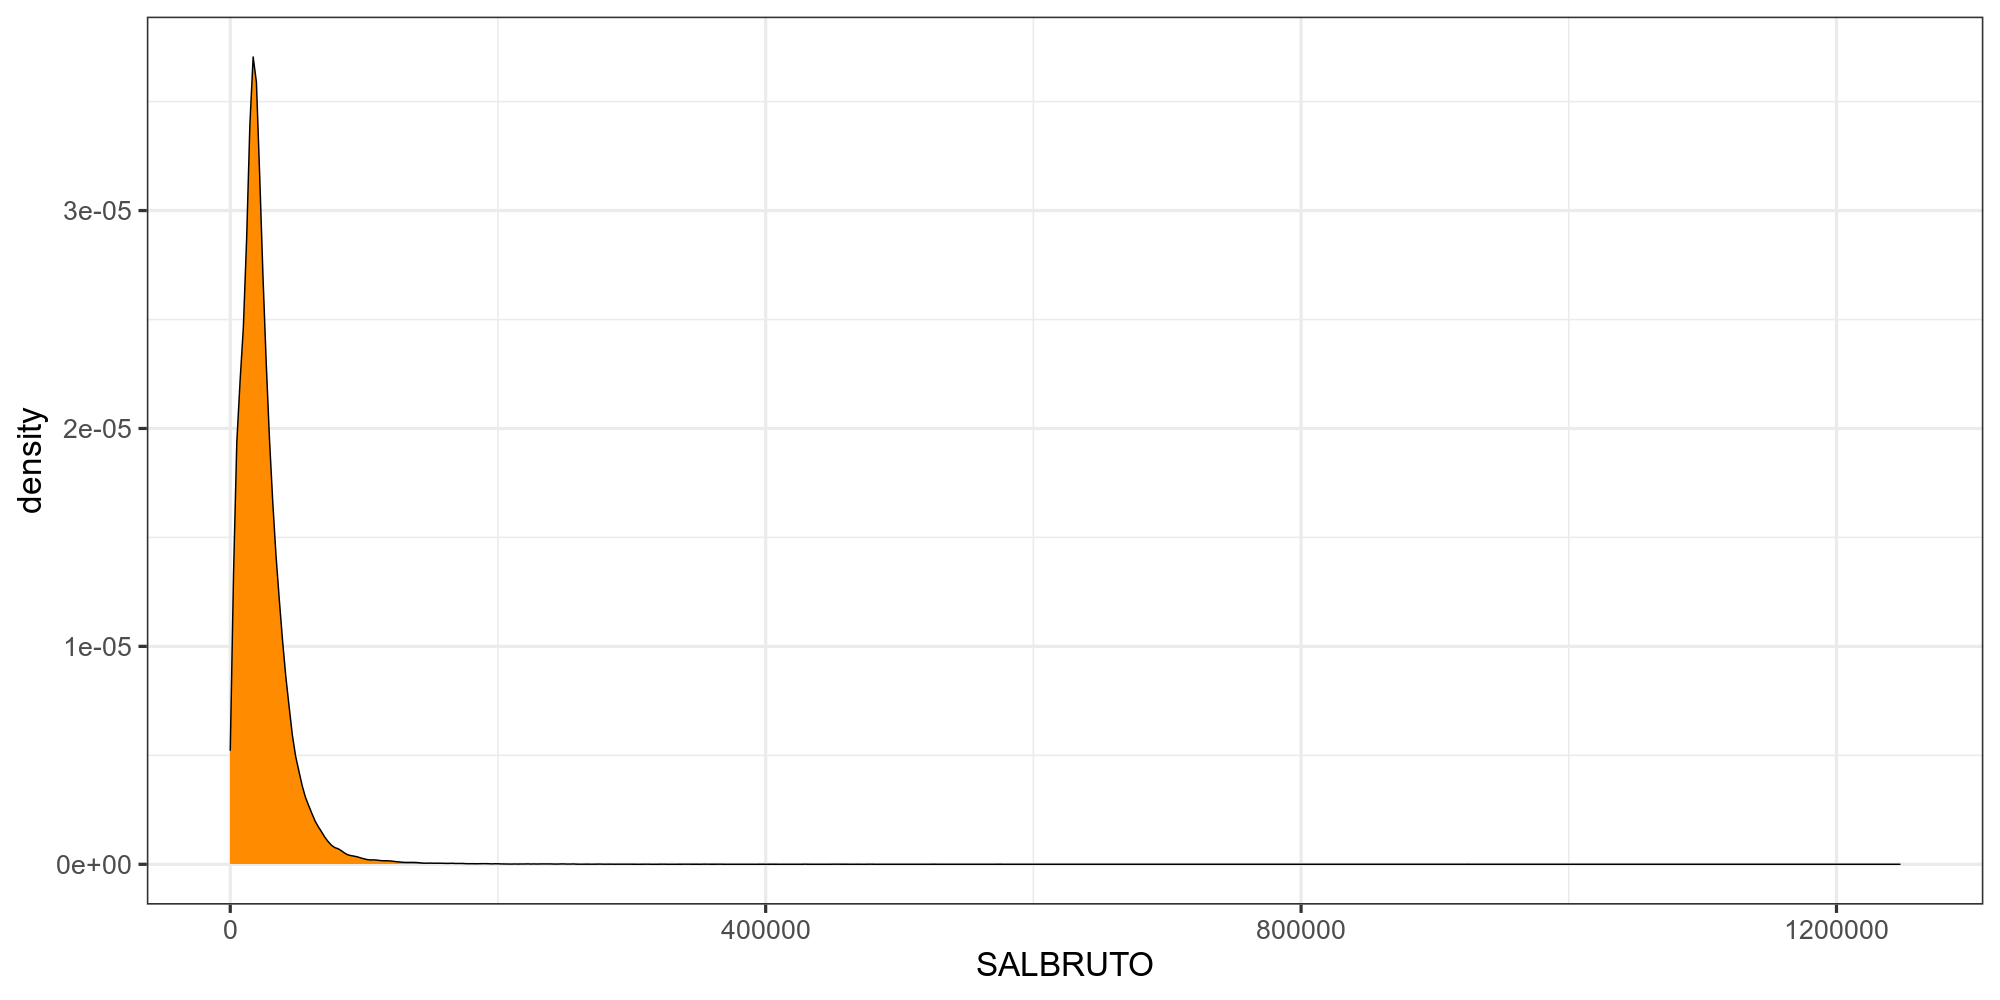

In [45]:
library(ggplot2)

# default plots size
options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 100)

# default theme and font size
theme_set(theme_bw(base_size = 24))



ggplot(salary, aes(x=SALBRUTO)) + geom_density(fill="darkorange", color="black")

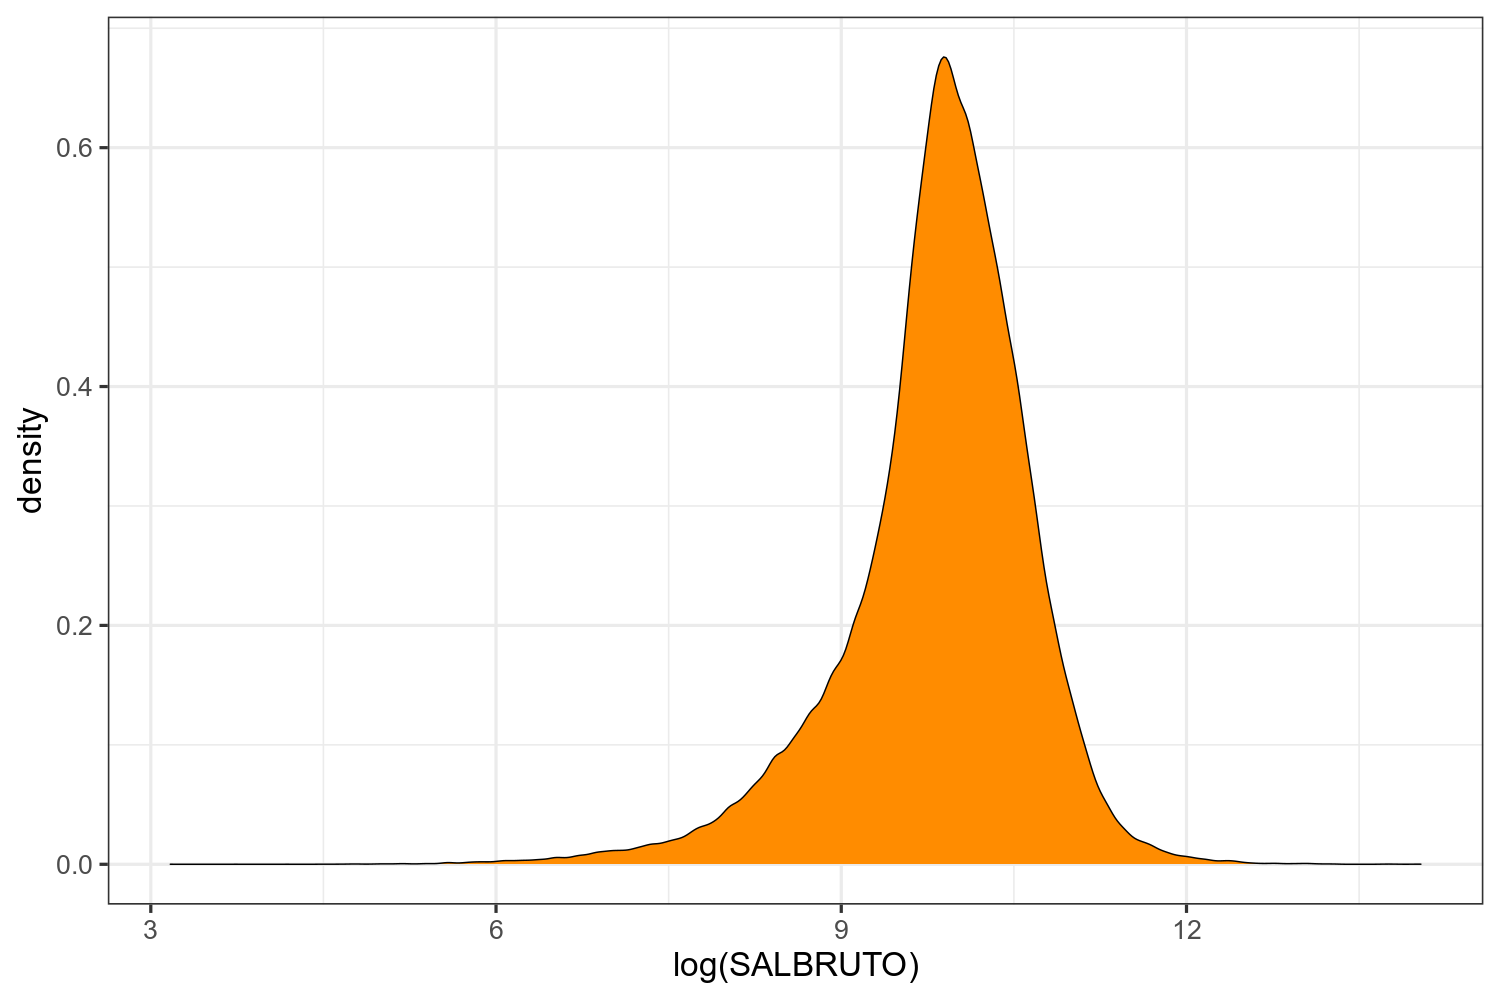

In [13]:
ggplot(salary, aes(x=log(SALBRUTO))) + geom_density(fill="darkorange", color="black")

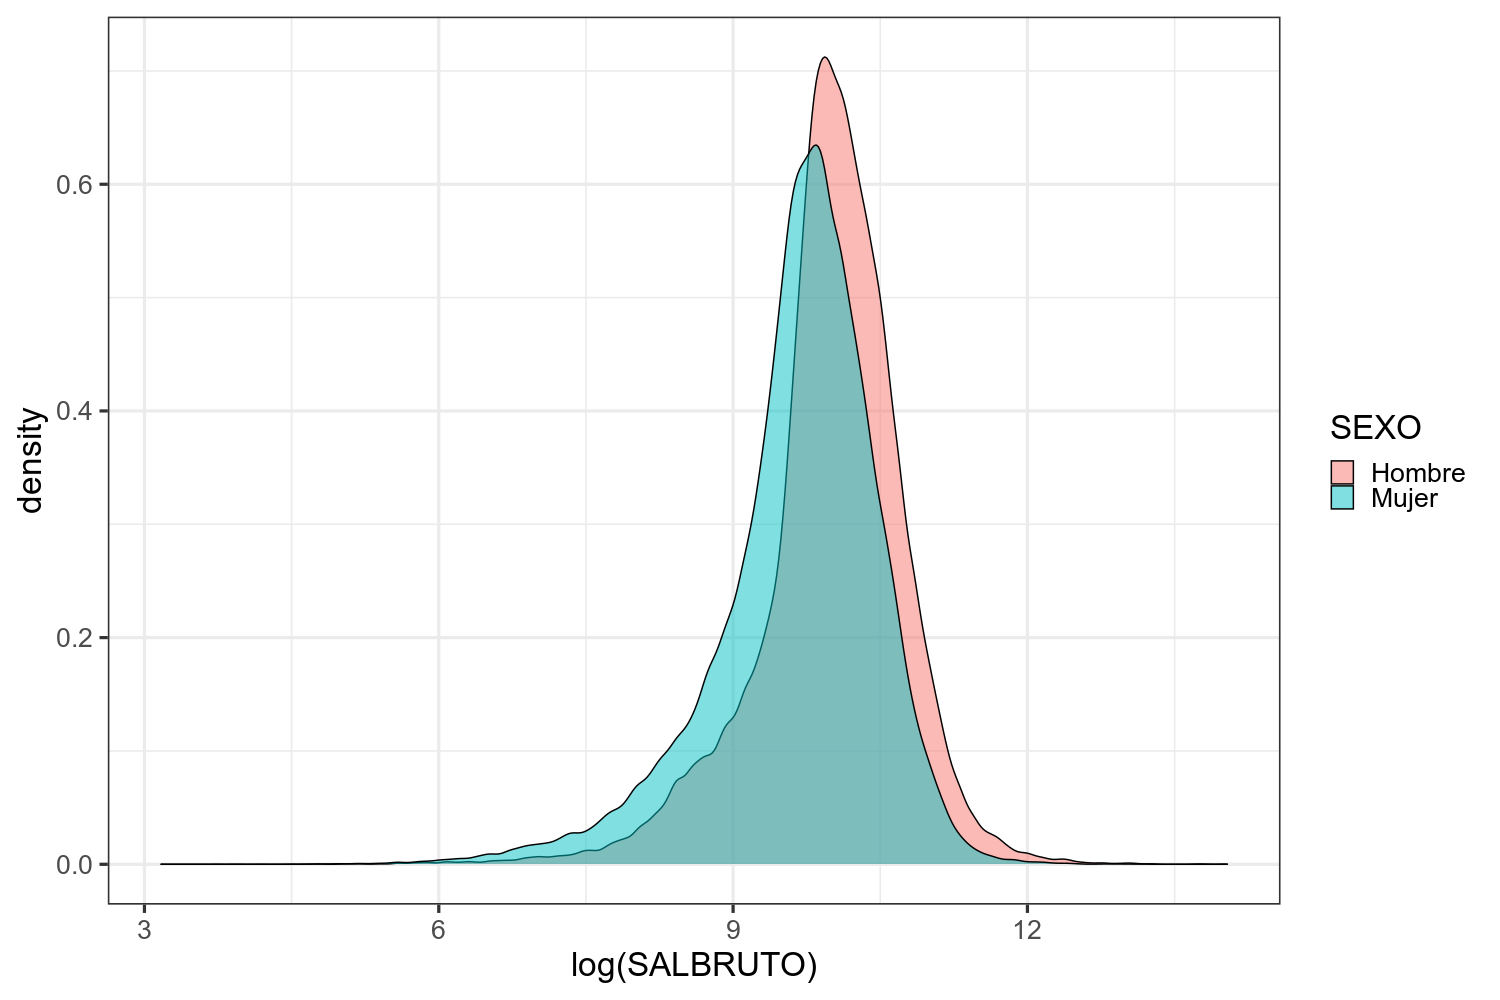

In [15]:
ggplot(salary, aes(x=log(SALBRUTO))) + geom_density(aes(fill=SEXO),  color="black", alpha=0.5)

In [27]:
# How different are wages, on average? Remember aggregate?
aggregate(salary$SALBRUTO, by=list(salary$SEXO), mean)

Group.1,x
<chr>,<dbl>
Hombre,27955.46
Mujer,20530.37


In [28]:
# A0	DIRECTORES Y GERENTES
# B0	TÉCNICOS Y PROFESIONALES CIENTÍFICOS E INTELECTUALES DE LA SALUD Y LA ENSEÑANZA
# C0	OTROS TÉCNICOS Y PROFESIONALES CIENTÍFICOS E INTELECTUALES
# D0	TÉCNICOS; PROFESIONALES DE APOYO
# E0	EMPLEADOS DE OFICINA QUE NO ATIENDEN AL PÚBLICO
# F0	EMPLEADOS DE OFICINA QUE ATIENDEN AL PÚBLICO
# G0	TRABAJADORES DE LOS SERVICIOS DE RESTAURACION Y COMERCIO
# H0	TRABAJADORES DE LOS SERVICIOS DE SALUD Y EL CUIDADO DE PERSONAS
# I0	TRABAJADORES DE LOS SERVICOS DE PROTECCION Y SEGURIDAD
# J0	TRABAJADORES CUALIFICADOS EN EL SECTOR AGRÍCOLA, GANADERO, FORESTAL Y PESQUERO
# K0	TRABAJADORES CUALIFICADOS DE LA CONSTRUCCION, EXCEPTO LOS OPERADORES DE MÁQUINAS
# L0	TRABAJADORES CUALIFICADOS DE LAS INDUSTRIAS MANUFACTURERAS, EXCEPTO OPERADORES DE INSTALACIONES Y MÁQUINAS
# M0	OPERADORES DE INSTALACIONES Y MAQUINARIA FIJAS, Y MONTADORES
# N0	CONDUCTORES Y OPERADORES DE MAQUINARIA MOVIL
# O0	TRABAJADORES NO CUALIFICADOS EN SERVICIOS
# P0	PEONES DE LA AGRICULTURA, PESCA, CONSTRUCCIÓN, INDUSTRIAS MANUFACTURERAS Y TRANSPORTES
# Q0	OCUPACIONES MILITARES

# How different are wages by position?
aggregate(salary$SALBRUTO, by=list(salary$CNO1), mean)

Group.1,x
<chr>,<dbl>
A0,65335.14
B0,28935.07
C0,37657.04
D0,29646.58
E0,21233.42
F0,17748.21
G0,14422.91
H0,14482.41
I0,21239.06


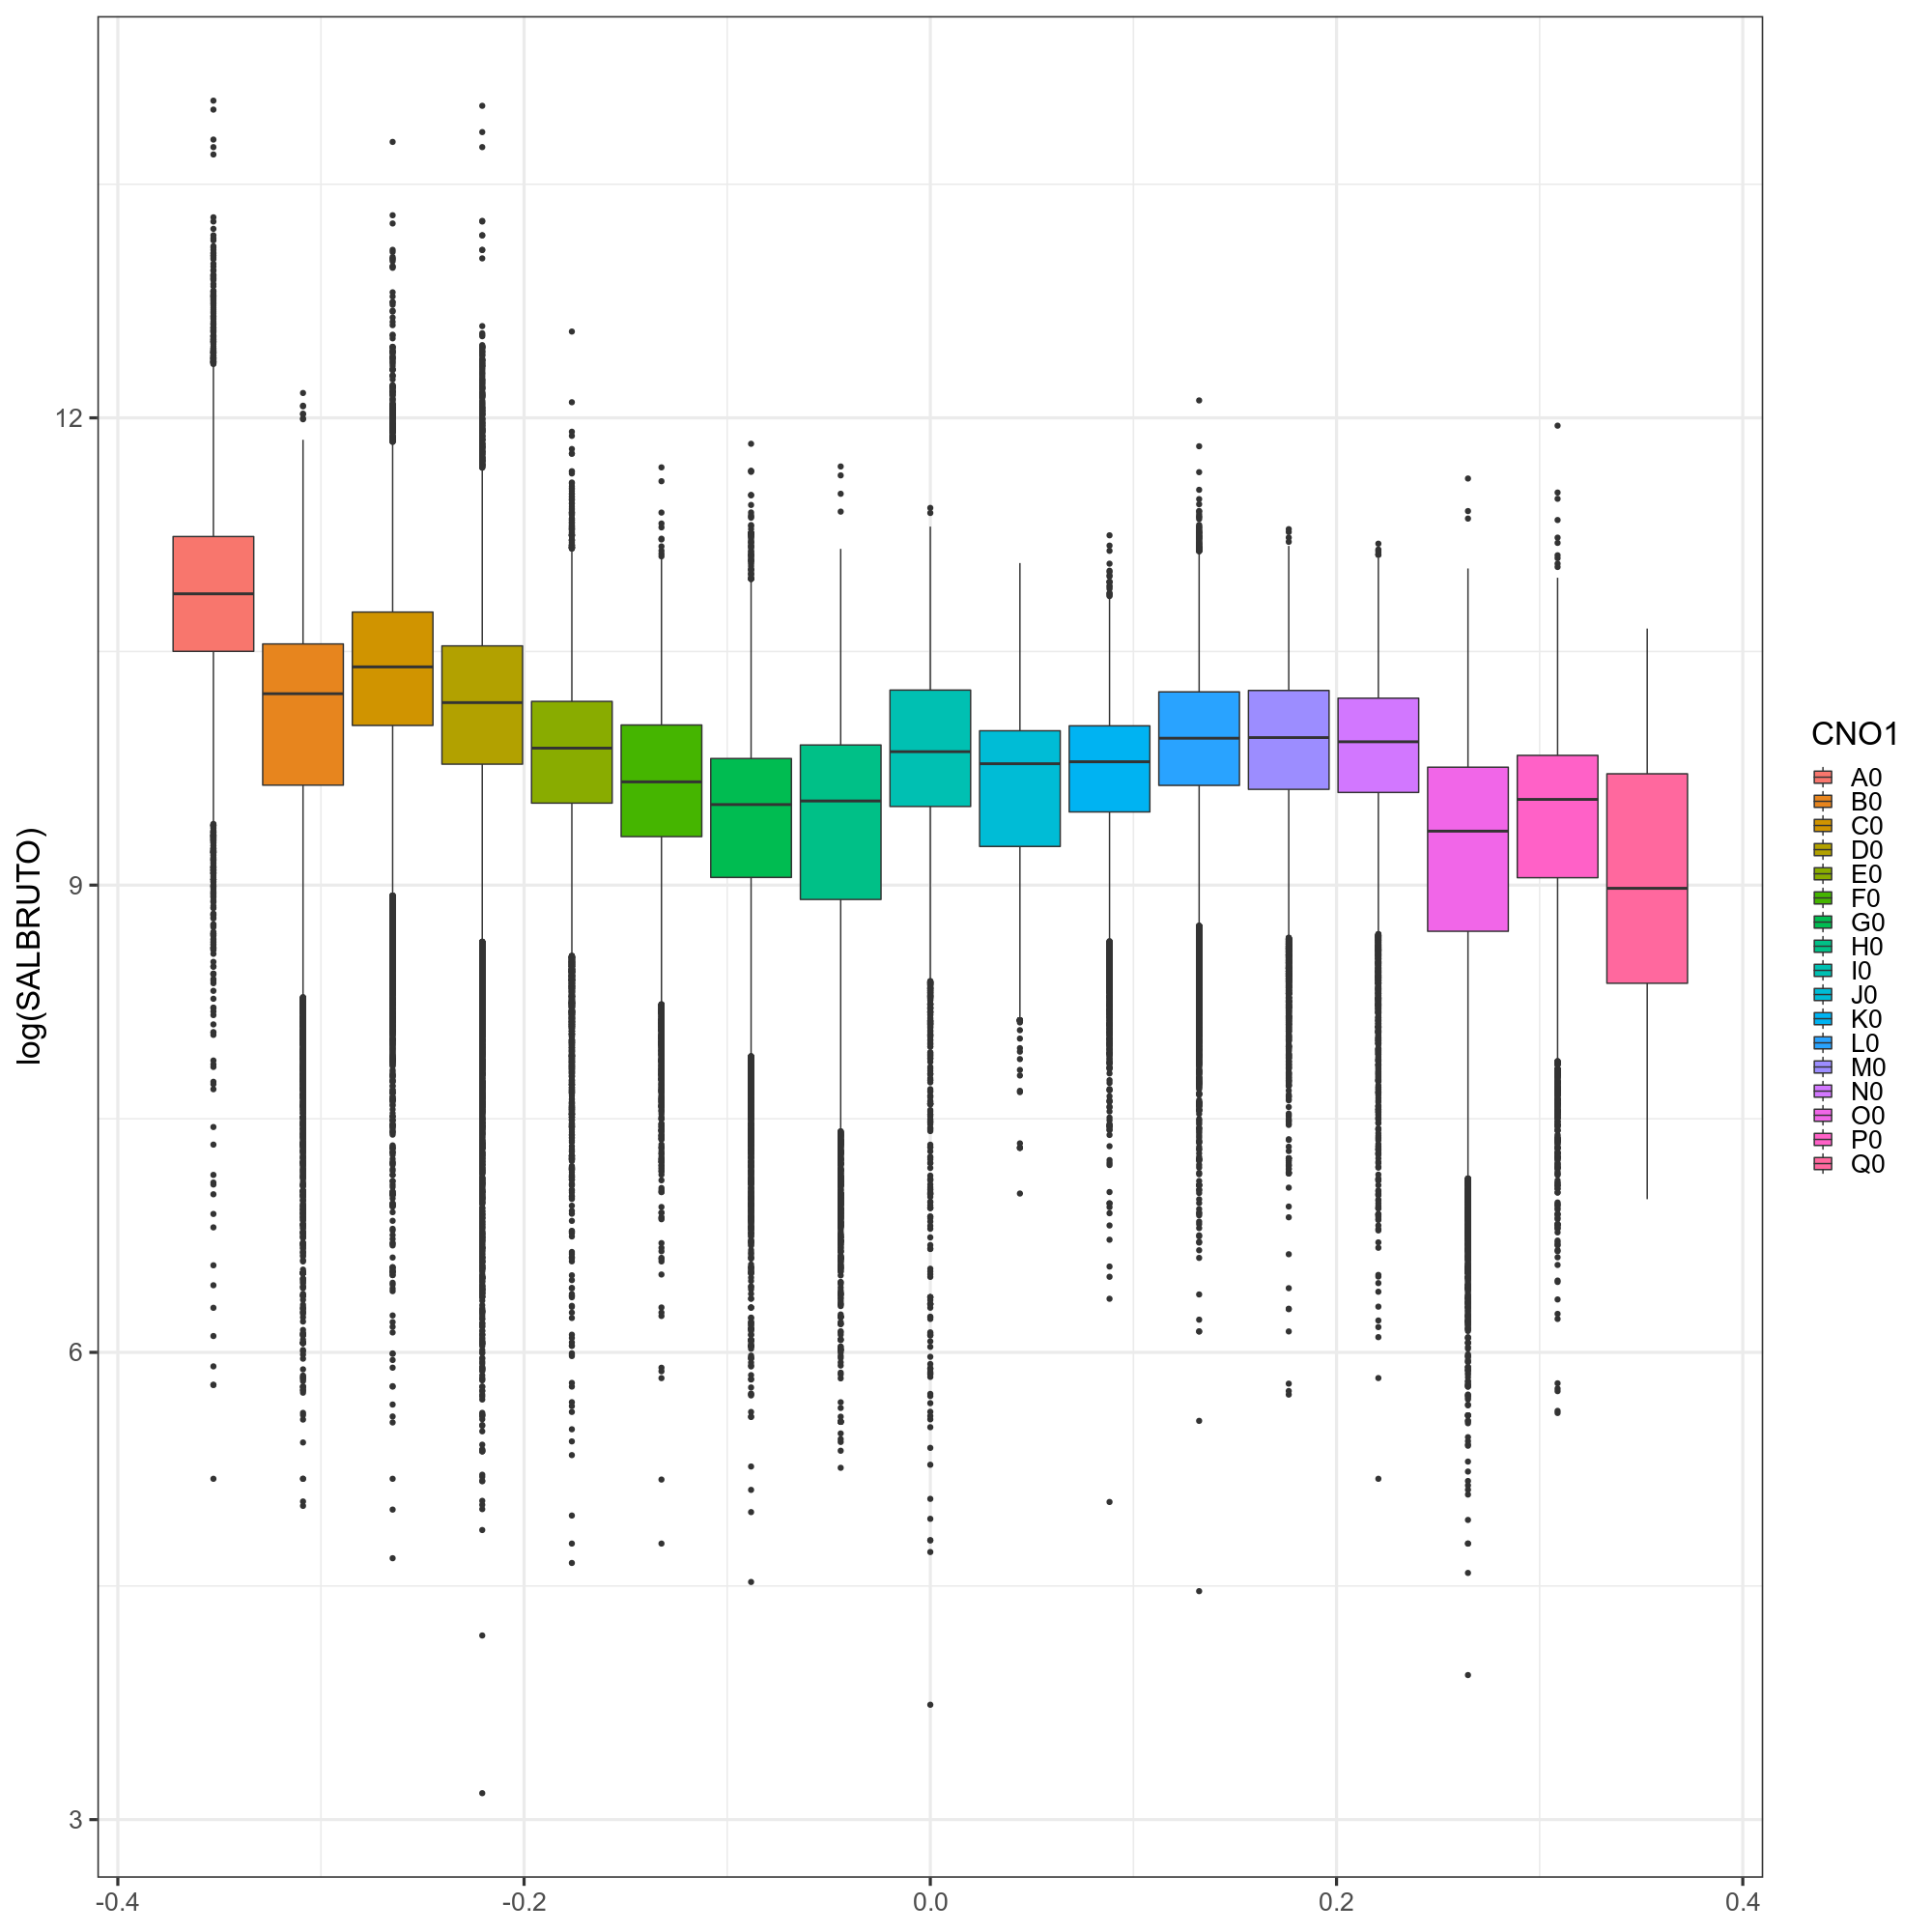

In [153]:
# Boxplots by positions
ggplot(salary, aes(y=log(SALBRUTO))) + geom_boxplot(aes(fill=CNO1))

In [67]:
# Let's compare wages between sexes depending on position
means <- aggregate((salary$SALBRUTO), by=list(salary$SEXO, salary$CNO1), mean)
sds <- aggregate((salary$SALBRUTO), by=list(salary$SEXO, salary$CNO1), sd)

head(means)
head(sds)

sex_positions <- data.frame(SEXO=means$`Group.1`, Position=means$`Group.2`,   mean=means$x, sd=sds$x)
sex_positions

,Group.1,Group.2,x
,<chr>,<chr>,<dbl>
1,Hombre,A0,10.951425
2,Mujer,A0,10.656055
3,Hombre,B0,10.067118
4,Mujer,B0,9.960023
5,Hombre,C0,10.451059
6,Mujer,C0,10.190106


,Group.1,Group.2,x
,<chr>,<chr>,<dbl>
1,Hombre,A0,0.7009147
2,Mujer,A0,0.6449466
3,Hombre,B0,0.9573626
4,Mujer,B0,0.8500406
5,Hombre,C0,0.6660881
6,Mujer,C0,0.6645095


SEXO,Position,mean,sd
<chr>,<chr>,<dbl>,<dbl>
Hombre,A0,10.951425,0.7009147
Mujer,A0,10.656055,0.6449466
Hombre,B0,10.067118,0.9573626
Mujer,B0,9.960023,0.8500406
Hombre,C0,10.451059,0.6660881
Mujer,C0,10.190106,0.6645095
Hombre,D0,10.193346,0.7240599
Mujer,D0,9.893250,0.7560129
Hombre,E0,9.935581,0.6512734


## Facets

Facets allow you to create multiple plot based on factors.

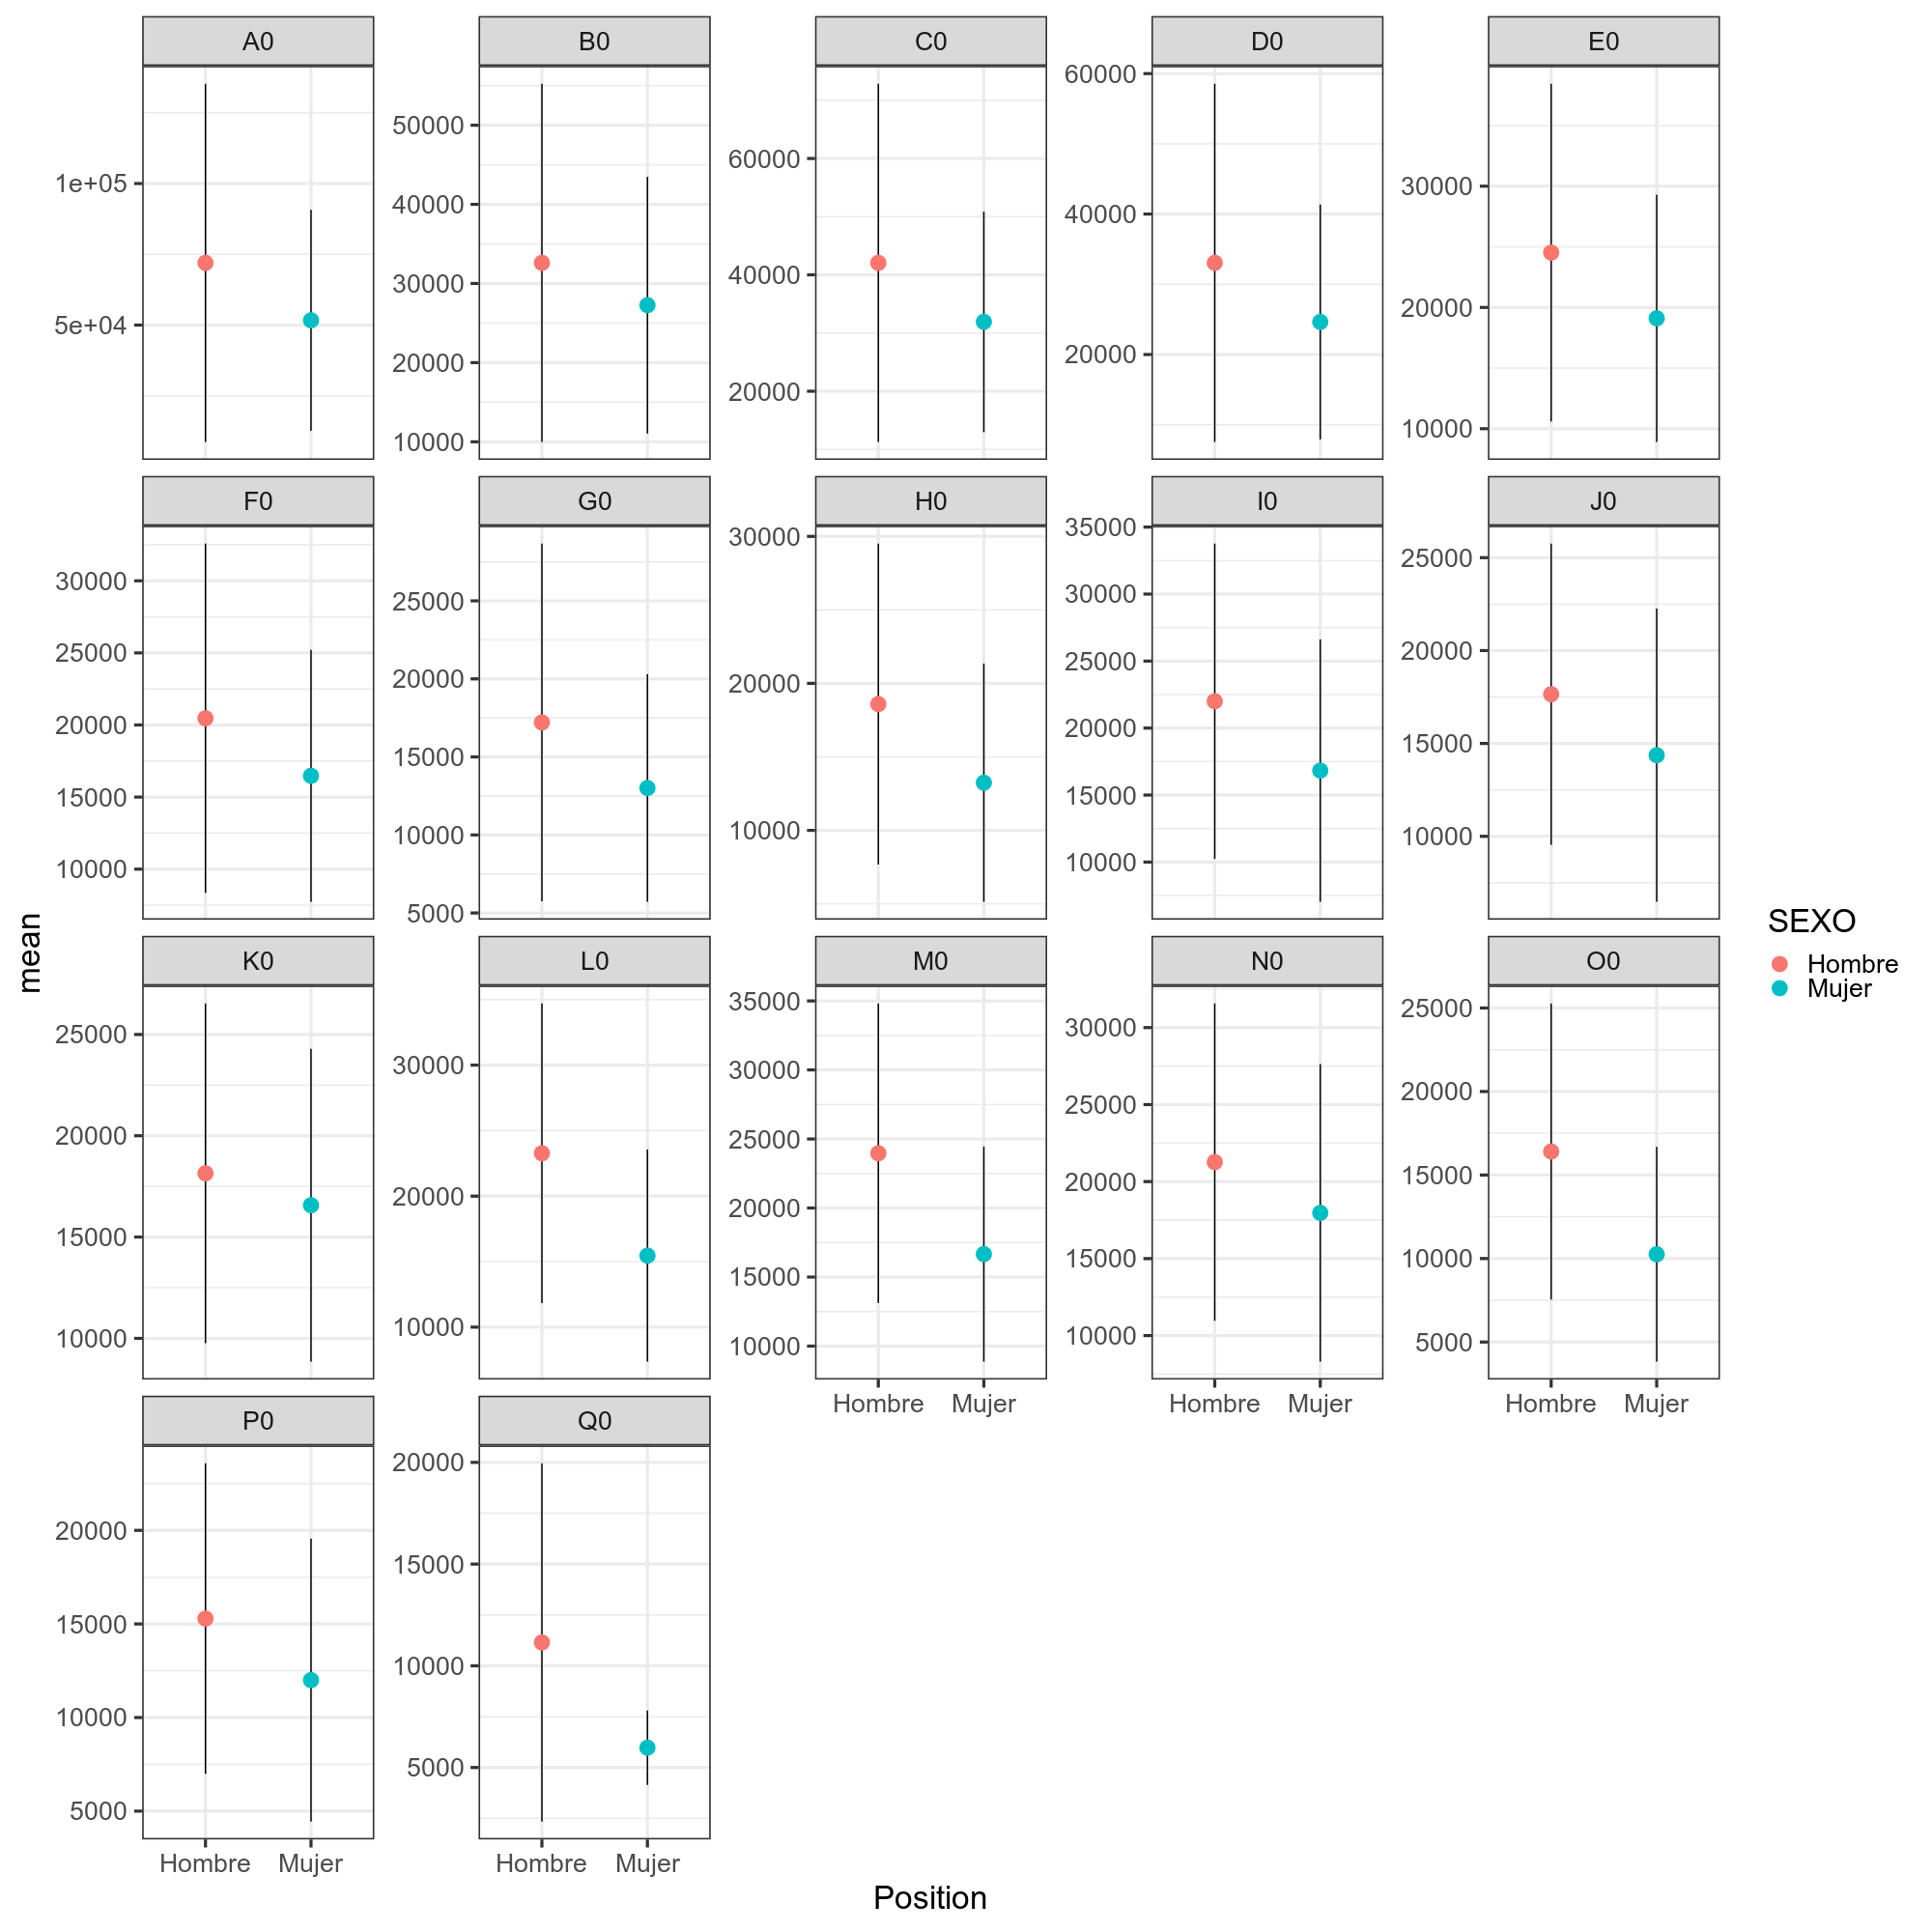

In [151]:
means <- aggregate((salary$SALBRUTO), by=list(salary$SEXO, salary$CNO1), mean)
sds <- aggregate((salary$SALBRUTO), by=list(salary$SEXO, salary$CNO1), sd)

sex_positions <- data.frame(SEXO=means$`Group.1`, Position=means$`Group.2`,   mean=means$x, sd=sds$x)


options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)


# Let's compare wages between sexes depending on position
#ggplot(sex_positions, aes(x=Position, y=mean)) + geom_point(aes(color=SEXO), size=5)
#ggplot(sex_positions, aes(x=Position, y=mean)) + geom_point(aes(x=SEXO, color=SEXO), size=5) + facet_wrap(Position~.)
ggplot(sex_positions, aes(x=Position, y=mean)) + 
    geom_errorbar(aes(x=SEXO, ymin=mean-sd, ymax=mean+sd), width=0) + 
    geom_point(aes(x=SEXO, color=SEXO), size=5) +     
    facet_wrap(Position~., scales = "free_y")

SEXO,ESTU,median,mad
<chr>,<int>,<dbl>,<dbl>
Hombre,1,9.552035,0.7206533
Mujer,1,9.019467,0.8484114
Hombre,2,9.678520,0.6815540
Mujer,2,9.152834,0.8317309
Hombre,3,9.767660,0.6636415
Mujer,3,9.335045,0.7945205
Hombre,4,9.949457,0.7238828
Mujer,4,9.568651,0.7351578
Hombre,5,10.109206,0.5975210


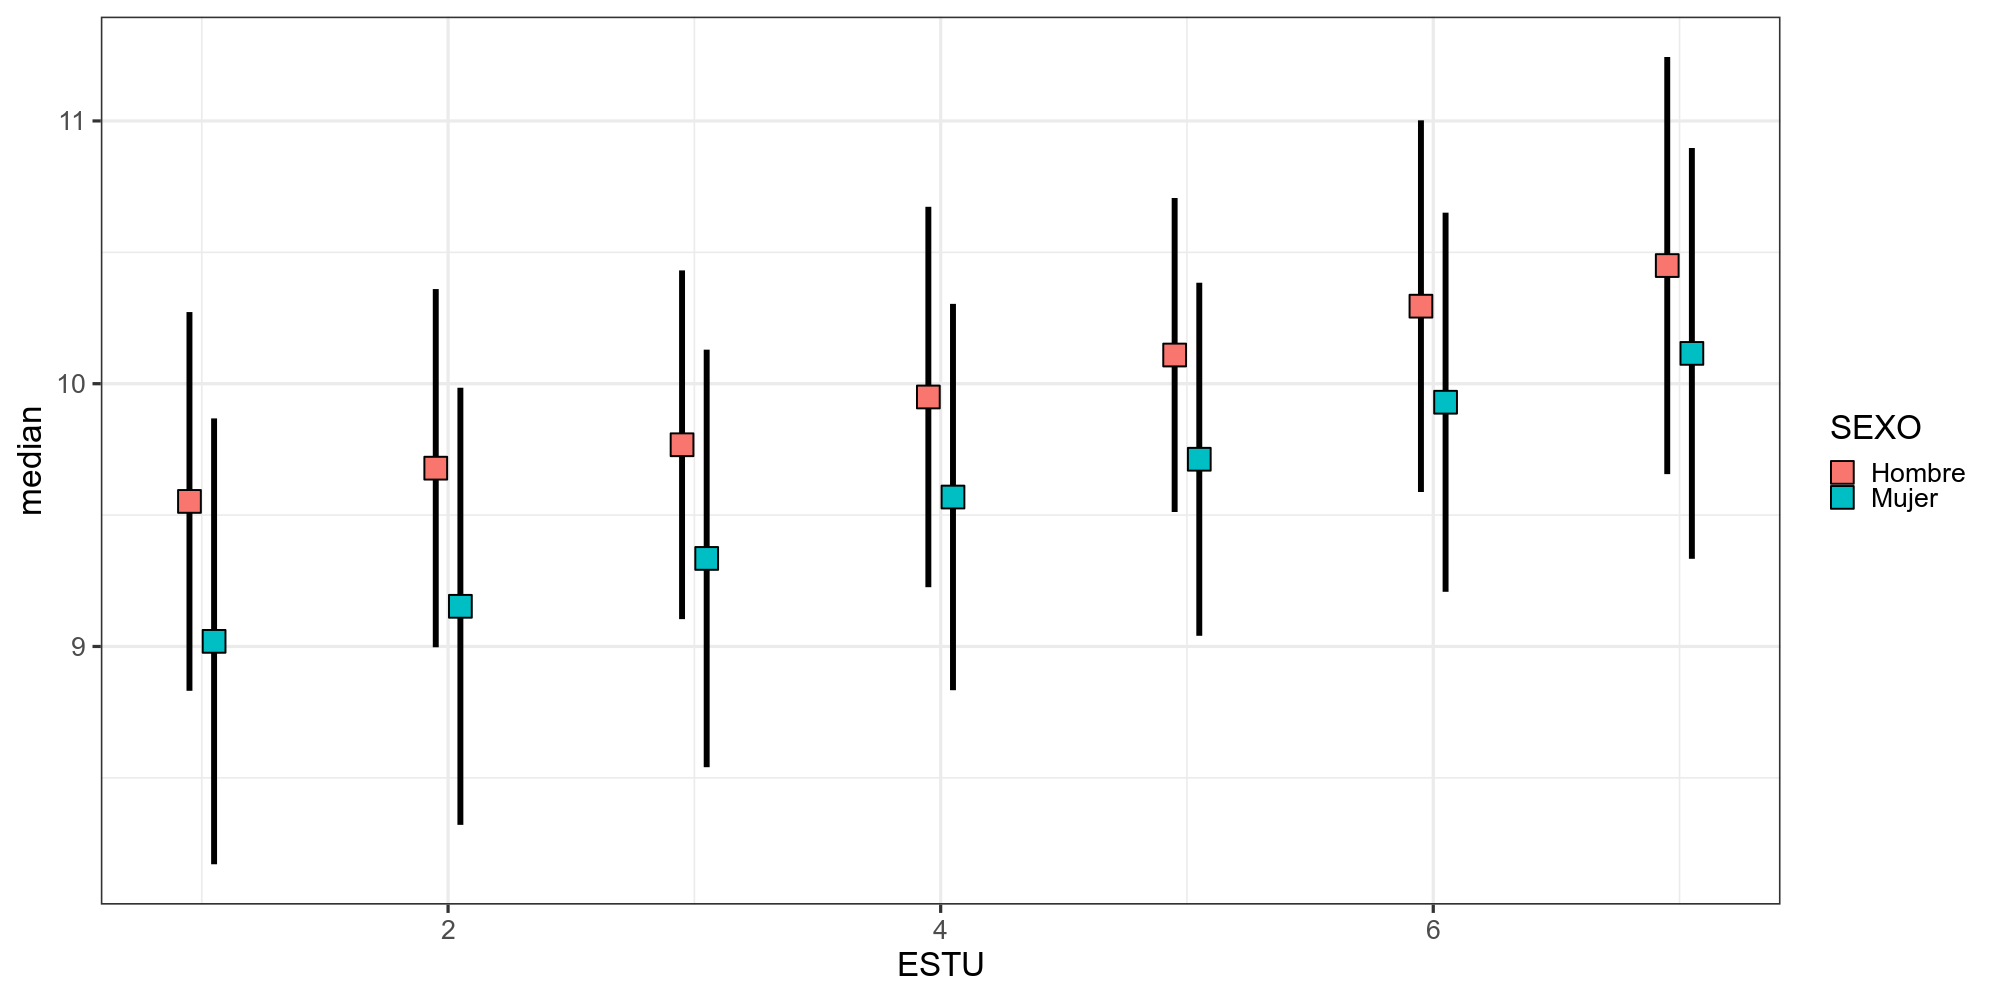

In [155]:
options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 100)


# Let's compare wages between sexes depending on studies
medians <- aggregate(log(salary$SALBRUTO), by=list(salary$SEXO, salary$ESTU), mean)
mads <- aggregate(log(salary$SALBRUTO), by=list(salary$SEXO, salary$ESTU), sd)

sex_estu <- data.frame(SEXO=medians$`Group.1`, ESTU=medians$`Group.2`,   median=medians$x, mad=mads$x)
sex_estu

# geom_pointragne allows you to put dots and bars at the same time
ggplot(sex_estu) + geom_pointrange(aes(x=ESTU, y=median, ymin=median-mad, ymax=median+mad, fill=SEXO), size=2, shape=22, color="black", position = position_dodge(width=0.2))